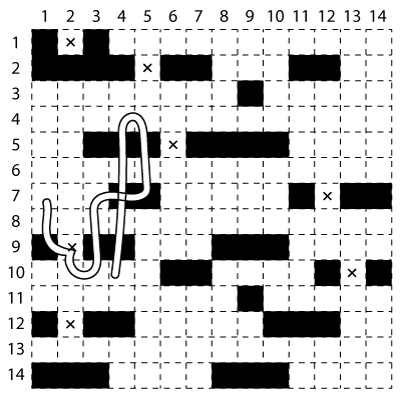

Slika kaže razpored ovir v testih. Funkcije morajo delovati za poljuben razpored ovir (predpostaviti pa smeš, da se ovire ne prekrivajo) in velikost steze.

Ovire so podane kot seznam terk `(y, x0, x1)`, kjer je `y` številka vrstice, x0 in x1 pa skrajni levi in desni stolpec ovire. Seznam ovir ni urejen ne po vrsticah ne kakorkoli drugače.

## 1. Prehodi

Prehodi so prosta polja, ki imajo na sosednjem levem in desnem polju oviro. Na sliki so označena s križci. Napiši funkcijo prehodi(ovire), ki vrne množico koordinat prehodov v obliki parov (y, x).

### Rešitev

Lahko gremo prek seznama vseh parov ovir in za vsak par preverimo, ali je med njima stisnjen prehod. Ker ovire niso urejene, bo potrebno narediti dvojno zanko:

```
    for ya, xa0, xa1 in ovire:
        for yb, xb0, xb1 in ovire:
```

Za vsak preverimo, ali sta v isti vrstici in ali se druga ovira začne dve polji po koncu prve ovire. Če je tako, dodamo vmesno polje v množico.

In [1]:
def prehodi(ovire):
    preh = set()
    for ya, xa0, xa1 in ovire:
        for yb, xb0, xb1 in ovire:
            if ya == yb and xb0 == xa1 + 2:
                preh.add((ya, xa1 + 1))
    return preh

Če smo čisto strogi, to ni čisto prava rešitev: kaj, če bi bila na polju med tema ovirama zagozdena še ena ovira dolžine 1? Tega sicer nikoli nismo videvali: dve oviri, ki se vodoravno stikata, sta bili vedno ena ovira. Če bi nas to skrbelo, bi lahko odšteli še vse ovire dolžine 1,

```
    return pref - {(y, x0) for y, x0, x1 in ovire if x0 == x1}
```

Vendar na to možnost nisem pomislil niti pri sestavljanju nalog, niti pri sestavljanju testov, zato ne bomo nikomur zamerili, če je rešil tako, kot zgoraj.

Še manjši detajl: spremenljivk `xa0` in `xb1` v resnici ne potrebujemo, zato bi ju lahko zamenjali s `_`.

In [2]:
def prehodi(ovire):
    preh = set()
    for ya, _, xa1 in ovire:
        for yb, xb0, _ in ovire:
            if ya == yb and xb0 == xa1 + 2:
                preh.add((ya, xa1 + 1))
    return preh

Zdaj pa kakšna boljša rešitev. Lahko, recimo, najprej razmečemo ovire po vrsticah. Sestavimo slovar, katerega ključi so številke vrstic, `y`, vrednosti pa začetek in konec ovire v teh vrstici, torej `(x0, x1)`.

```python
    vrstice = defaultdict(list)
    for y, x0, x1 in ovire:
        vrstice[y].append((x0, x1))
```

Vemo, da je lahko prehod le med dvema zaporednima ovirama. Gremo torej čez vrstice. Seznam ovir v vsaki vrstici uredimo in zdaj vemo, da je lahko ovira le med zaporednim parom. Pa imamo:

In [3]:
def prehodi(ovire):
    vrstice = defaultdict(list)
    for y, x0, x1 in ovire:
        vrstice[y].append((x0, x1))
    prehodi = set()
    for y, xs in vrstice.items():
        xs.sort()
        for (_, xa1), (xb0, _) in zip(xs, xs[1:]):
            if xb0 == xa1 + 2:
                prehodi.add((y, xa1 + 1))
    return prehodi

Zanimiva je zanka, `for (_, x0), (x1, _) in zip(xs, xs[1:])`. `xs` je seznam začetkov in koncev ovir - se pravi parov. Če naredimo `zip(xs, xs[1:])` bomo dobili pare parov. Zato jih razpakiramo v `(xa0, xa1), (xb0, xb1)`. Ker `xa0` in `xb1` ne potrebujemo, pa ju, tako kot zgoraj, zamenjamo s podčrtaji.

Še lažje pa je, če se izognemo razmetavanju po vrsticah in uredimo kar celoten seznam. Python terke ureja najprej po prvem elementu - v našem primeru so to številke vrstic -, če je prvi enak, pa po drugem, torej stolpcu. Natančno to kar potrebujemo: potem bomo šli preprosto po zaporednih ovirah v tako urejenem seznamu. Med dvema ovirama je prehod, če sta v isti vrstici in je med njima prosto poklje.

In [4]:
def prehodi(ovire):
    ovire = sorted(ovire)
    preh = set()
    for (ya, _, xa1), (yb, xb0, _) in zip(ovire, ovire[1:]):
        if ya == yb and xb0 == xa1 + 2:
            preh.add((ya, xa1 + 1))
    return preh

Tule je pomembno, da napišemo `ovire = sorted(ovire)` in ne `ovire.sort()`. Prvo sestavi nov seznam in mu dodeli isto ime (`ovire`), drugo pa spreemni seznam, ki smo ga podali funkciji kot argument. Tega pa ne smemo početi.

Od različice 3.10 ima Python v modulu `collections` funkcijo `pairwise`. Klic `pairwise(s)` naredi (praktično) isto kot `zip(s, s[1:])`. To nam skrajša funkcijo v

In [5]:
def prehodi(ovire):
    preh = set()
    for (ya, _, xa1), (yb, xb0, _) in pairwise(sorted(ovire)):
        if ya == yb and xb0 == xa1 + 2:
            preh.add((ya, xa1 + 1))
    return preh

In kdor se še malo znajde, napiše kar

In [6]:
def prehodi(ovire):
    return {(ya, xa1 + 1)
            for (ya, _, xa1), (yb, xb0, _) in pairwise(sorted(ovire))
            if ya == yb and xb0 == xa1 + 2}

## Nadloga

Nek kolesar obvlada veščino skakanja po ovirah. Napiši funkcijo stevilo_ovir(ovire, y, x, pot), ki prejme ovire, začetne koordinate kolesarja (te nikoli niso na oviri!) in pot v obliki niza znakov <, >, ^ in v. Vrne naj število različnih ovir, na katere je naletel. Klic stevilo_ovir(ovire, 10, 4, "^^^^^^>vvv<<vvv<^<^^"), ki opisuje pot na sliki, vrne 4.

### Rešitev

Kolesarja bo potrebno voziti okrog. To lahko počnemo tako

```python
    for smer in pot:
        if smer == "<":
            x -= 1
        elif smer == ">":
            x += 1
        elif smer == "^":
            y -= 1
        elif smer == "v":
            y += 1
```

ali pa kar tako:

```python
    for smer in pot:
        x, y = {"<": (x - 1, y), "^": (x, y - 1), "v": (x, y + 1), ">": (x + 1, y)}[smer]
```

Zdaj pa le zlagamo vse ovire, ki jih zadane, v množico in na koncu vrnemo njeno velikost. Če isto oviro dodamo večkrat, bo v množici le enkrat - kar je itak čar množic.

In [7]:
def stevilo_ovir(ovire, y, x, pot):
    zadete = set()
    for smer in pot:
        if smer == "<":
            x -= 1
        elif smer == ">":
            x += 1
        elif smer == "^":
            y -= 1
        elif smer == "v":
            y += 1
        for yo, x0, x1 in ovire:
            if yo == y and x0 <= x <= x1:
                zadete.add((y, x0, x1))
    return len(zadete)

Krajše pa gre tako:

In [8]:
def stevilo_ovir(ovire, y, x, pot):
    zadete = set()
    for p in pot:
        x, y = {"<": (x - 1, y), "^": (x, y - 1), "v": (x, y + 1), ">": (x + 1, y)}[p]
        for yo, x0, x1 in ovire:
            if yo == y and x0 <= x <= x1:
                zadete.add((y, x0, x1))
    return len(zadete)

## 3. Odstranjevanje

Doslejšnji vodja MOL-ovega Oddelka za gospodarske dejavnosti in motorni promet, g. Polutnik, bo po novem šef kanalizacije. (To ni šala, preverite!)

Napiši funkcijo `odstrani(ovire, stolpci)`, ki prejme seznam ovir in številk stolpcev in vrne seznam vseh ovir, ki ne zapirajo nobenega od podanih stolpcev.

Če želiš napiši pomožno funkcijo `zapira(ovira, stolpci)`, ki bo vrnila `True`, če ovira zapira katerega od podanih stolpcev. Ta funkcija je neobvezna in se ne testira, lahko pa ti pomaga.


### Rešitev

Ubogajmo, napišimo `zapira(ovira, stolpci)`. Lahko je daljša.
Najpreprosteje je tako:


In [9]:
def zapira(ovira, stolpci):
    y, x0, x1 = ovira
    for stolpec in stolpci:
        if x0 <= stolpec <= x1:
            return True
    return False

Ali krajša.

In [10]:
def zapira(ovira, stolpci):
    return any(ovira[1] <= x <= ovira[2] for x in stolpci)

Odstrani zdaj vrne seznam ovir, ki ne zapirajo nobenega stolpca.

In [11]:
def odstrani(ovire, stolpci):
    return [ovira for ovira in ovire if not zapira(ovira, stolpci)]

Če ne ubogamo in ne definiramo funkcija `zapira`, pa pač zbašemo oboje v eno funkcijo. To gre le, če je `zapira` dolga eno vrstico - sicer se malo zaplete, zato tja ne bomo rinili. Tule pa je rešitev v eni funkciji.

In [12]:
def odstrani(ovire, stolpci):
    return [ovira for ovira in ovire
            if not any(ovira[1] <= x <= ovira[2] for x in stolpci)]

## 4. Žaba

Tudi žabe si ne upajo stopiti na kolesarsko pot, temveč se premikajo zgolj po ovirah. Pri tem hodijo levo in desno po ovirah, skačejo pa vedno samo naravnost navgor. Zaradi močnega vetra.

Napiši funkcijo `najsirsa(ovire, ovira)`, ki prejme seznam ovir in začetno oviro (kot terko (y, x0, x1)). Vrniti mora širino najširše ovire, ki jo lahko doseže žaba. 

V pomoč: v datoteki s testi je funkcija `naprej(ovire, ovira)`, ki vrne vse ovire, na katere je možno skočiti z ovira. Uporabi jo. :)


### Rešitev

Ali je najširša ta ovira, ali pa je ena od naslednjih.

In [13]:
# Funkcija, ki je podana:

def naprej(ovire, ovira):
    yo, xo0, xo1 = ovira
    return [(y, x0, x1) for y, x0, x1 in ovire
            if y < yo and (x0 <= xo0 <= x1 or xo0 <= x0 <= xo1)]


def najsirsa(ovire, ovira):
    naj = ovira[2] - ovira[1] + 1
    for nasl in naprej(ovire, ovira):
        naj = max(naj, najsirsa(ovire, nasl))
    return naj